In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

In [8]:
image_dir = Path("/home/julia/workspace/datasets/2011_09_26/2011_09_26_drive_0048_sync/image_02/data")
lidar_dir = Path("/home/julia/workspace/datasets/2011_09_26/2011_09_26_drive_0048_sync/velodyne_points/data")

In [9]:
def load_image(index: int) -> np.ndarray:
    img_path = image_dir / f"{index:010d}.png"
    return cv2.imread(str(img_path))

def load_velodyne_points(index: int) -> np.ndarray:
    bin_path = lidar_dir / f"{index:010d}.bin"
    with open(bin_path, 'rb') as f:
        return np.fromfile(f, dtype=np.float32).reshape(-1, 4)

def filter_lidar_points(points: np.ndarray) -> np.ndarray:
    return points[points[:, 0] > 0]

def project_lidar_to_image(points_lidar: np.ndarray, projection_matrix: np.ndarray) -> np.ndarray:
    points_hom = np.hstack((points_lidar[:, :3], np.ones((points_lidar.shape[0], 1))))
    points_cam = projection_matrix @ points_hom.T
    points_img = points_cam[:2] / points_cam[2]
    return points_img.T

In [10]:
projection_matrix = np.array([
    [613.040929, -718.575854, -2.950028, -124.072003],
    [182.759005,   12.239512, -718.988552, -101.607812],
    [0.999893,     0.004697,    0.013829,   -0.269120]
])



In [11]:
image = load_image(0)
lidar_points = filter_lidar_points(load_velodyne_points(0))
projected_points = project_lidar_to_image(lidar_points, projection_matrix)

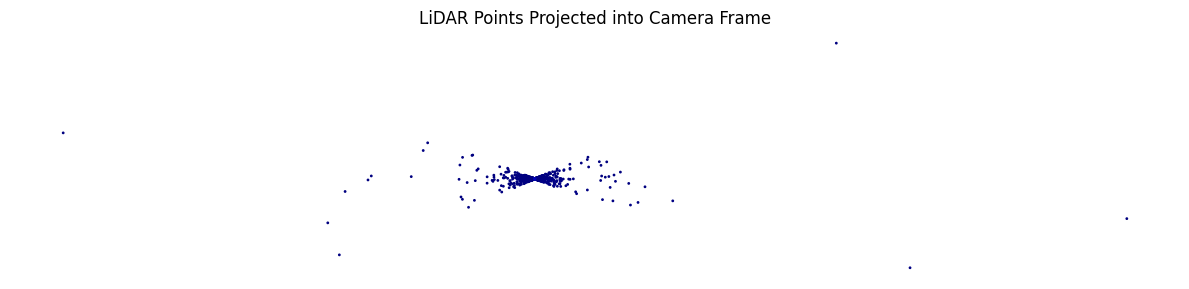

In [12]:
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.scatter(projected_points[:, 0], projected_points[:, 1], c=lidar_points[:, 0], s=1, cmap='jet')
plt.title("LiDAR Points Projected into Camera Frame")
plt.axis("off")
plt.tight_layout()
plt.show()